<a href="https://colab.research.google.com/github/Name-Generator/CSC101-Final-Project/blob/main/Open_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
with open('/content/drive/MyDrive/Leases.csv') as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    data_read = [row for row in reader]

In [ ]:
import numpy as np
print(np.shape(data_read))
data = np.array(data_read)

(194686, 35)


In [ ]:
from collections import Counter
# counting the things: index, thing
# 3, market
# 4, building_name
# 5, building_id
# 8, city
# 12, internal_class
# 15, internal_industry
# 16, transaction_type
# 19, space_type

# numbers:
# 13, leasedSF
# 21, RBA
# 22, available_space
# 23, availability_proportion
# 29, direct_overall_rent
# 33, sublet_availability_proportion


cnt = Counter(data[1:, 20])
print(len(cnt))
print(cnt)

2
Counter({np.str_('Suburban'): 132492, np.str_('CBD'): 62193})


In [ ]:
tech_data = data
tech_data = data[data[:,15] == 'Technology, Advertising, Media, and Information']
print(len(tech_data))
tech_cnt = Counter(tech_data[1:, 8])
print(tech_cnt)

3835
Counter({np.str_('New York'): 867, np.str_('San Francisco'): 191, np.str_('Chicago'): 146, np.str_('Austin'): 133, np.str_('Washington'): 129, np.str_('Atlanta'): 100, np.str_('Los Angeles'): 88, np.str_('San Jose'): 75, np.str_('San Diego'): 73, np.str_('Bellevue'): 64, np.str_('Arlington'): 64, np.str_('Reston'): 63, np.str_('Seattle'): 63, np.str_('Denver'): 61, np.str_('Houston'): 58, np.str_('McLean'): 52, np.str_('Irvine'): 51, np.str_('Santa Clara'): 51, np.str_('Boston'): 51, np.str_('Charlotte'): 41, np.str_('Tampa'): 40, np.str_('Herndon'): 40, np.str_('Philadelphia'): 39, np.str_('Sunnyvale'): 37, np.str_('Raleigh'): 33, np.str_('Santa Monica'): 32, np.str_('Burbank'): 30, np.str_('Dallas'): 29, np.str_('Plano'): 28, np.str_('Alpharetta'): 27, np.str_('Mountain View'): 23, np.str_('Culver City'): 22, np.str_('Chantilly'): 21, np.str_('Durham'): 21, np.str_('Miami'): 20, np.str_('Palo Alto'): 20, np.str_('Phoenix'): 18, np.str_('Tempe'): 18, np.str_('Vienna'): 16, np.str

In [ ]:
data_atlanta = data
data_atlanta = data[(data[:,3] == 'Atlanta')]
data_atlanta_tech = data_atlanta[data_atlanta[:,15] == 'Technology, Advertising, Media, and Information']
data_atlanta_finance = data_atlanta[data_atlanta[:,15] == 'Financial Services and Insurance']
data_atlanta_legal = data_atlanta[data_atlanta[:,15] == "Legal Services"]
data_atlanta_business = data_atlanta[data_atlanta[:,15] == "Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting"]
data_atlanta_construction = data_atlanta[data_atlanta[:,15] == "Construction, Engineering and Architecture"]
data_atlanta_healthcare = data_atlanta[data_atlanta[:,15] == "Healthcare"]
data_atlanta_estate = data_atlanta[data_atlanta[:, 15] == "Real Estate (except coworking providers)"]
data_atlanta_associations = data_atlanta[data_atlanta[:, 15] == "Associations and Non-profit Organizations (except Education and Non-profit Hospitals)"]
data_atlanta_retail = data_atlanta[data_atlanta[:, 15] == "Retail"]
data_atlanta_govt = data_atlanta[data_atlanta[:, 15] == "Government"]


print(len(data_atlanta))
print(len(data_atlanta_tech))
print(len(data_atlanta_finance))
print(len(data_atlanta_legal))
print(len(data_atlanta_business))
print(len(data_atlanta_construction))
print(len(data_atlanta_healthcare))
print(len(data_atlanta_estate))
print(len(data_atlanta_associations))
print(len(data_atlanta_retail))
print(len(data_atlanta_govt))

atlanta_data = dict()
sectors = ["Tech", "Finance", "Legal", "Business", "Construction", "Healthcare", "Estate", "Associations", "Retail", "Govt"]

atlanta_data.update({"Tech": data_atlanta_tech})
atlanta_data.update({"Finance": data_atlanta_finance})
atlanta_data.update({"Legal": data_atlanta_legal})
atlanta_data.update({"Business": data_atlanta_business})
atlanta_data.update({"Construction": data_atlanta_construction})
atlanta_data.update({"Healthcare": data_atlanta_healthcare})
atlanta_data.update({"Estate": data_atlanta_estate})
atlanta_data.update({"Associations": data_atlanta_associations})
atlanta_data.update({"Retail": data_atlanta_retail})
atlanta_data.update({"Govt": data_atlanta_govt})
print(len(atlanta_data))


7739
147
199
70
127
86
51
60
30
47
29
10


Now restart using pandas cuz its way better

In [ ]:
import pandas as pd
pandas_data = pd.read_csv("/content/drive/MyDrive/Leases.csv")

In [ ]:
df = pandas_data
column_name = df.columns[3]
print(column_name)
df_atlanta = df[df[column_name] == "Atlanta"]
print(df_atlanta.shape)

market
(7739, 35)


In [ ]:
sectors = ['Technology, Advertising, Media, and Information',
           'Financial Services and Insurance',
           "Legal Services",
           "Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting",
           "Construction, Engineering and Architecture",
           "Healthcare",
           "Real Estate (except coworking providers)",
           "Associations and Non-profit Organizations (except Education and Non-profit Hospitals)",
           "Retail",
           "Government"]
column_name = df.columns[15]
filtered_data = df_atlanta[df_atlanta[column_name].isin(sectors)]
filtered_data.shape

(846, 35)

In [ ]:
from pandas import to_datetime

filtered_data = filtered_data.copy()
year_col = filtered_data.columns[0]
quarter_col = filtered_data.columns[1]
print(year_col)
print(quarter_col)

quarter_to_month = {"Q1": "01", "Q2": "04", "Q3": "07", "Q4": "10"}
filtered_data["quarter_month"] = filtered_data[quarter_col].map(quarter_to_month)

filtered_data["date"] = pd.to_datetime(filtered_data[year_col].astype(str) + "-" + filtered_data["quarter_month"].astype(str), format='%Y-%m')
filtered_data_sorted = filtered_data.sort_values(by="date")


year
quarter


Looking at atlanta sector wise over time

['Technology, Advertising, Media, and Information', 'Financial Services and Insurance', 'Legal Services', 'Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting', 'Construction, Engineering and Architecture', 'Healthcare', 'Real Estate (except coworking providers)', 'Associations and Non-profit Organizations (except Education and Non-profit Hospitals)', 'Retail', 'Government']
leasing


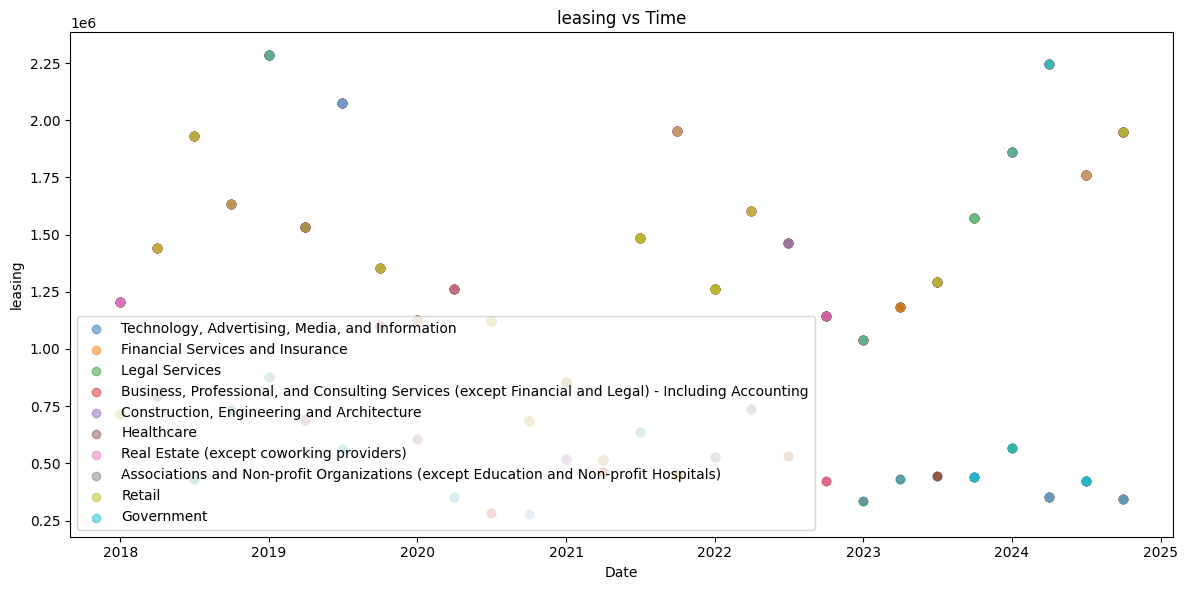

In [ ]:
import matplotlib.pyplot as plt

sector_column = df.columns[15]
what_column_we_lookin_at = filtered_data_sorted.columns[34]
which_sectors_we_want = slice(0,30)
print(sectors[which_sectors_we_want])
print(what_column_we_lookin_at)

plt.figure(figsize=(12, 6))
for sector in sectors[which_sectors_we_want]:
  specific_sector = filtered_data_sorted[filtered_data_sorted[sector_column] == sector]
  plt.scatter(specific_sector["date"], specific_sector[what_column_we_lookin_at], marker="o", alpha=0.5)
plt.legend(sectors[which_sectors_we_want])
plt.title(what_column_we_lookin_at + " vs Time")
plt.xlabel("Date")
plt.ylabel(what_column_we_lookin_at)
plt.tight_layout()
plt.show()

Looking at atlanta by sevils building quality

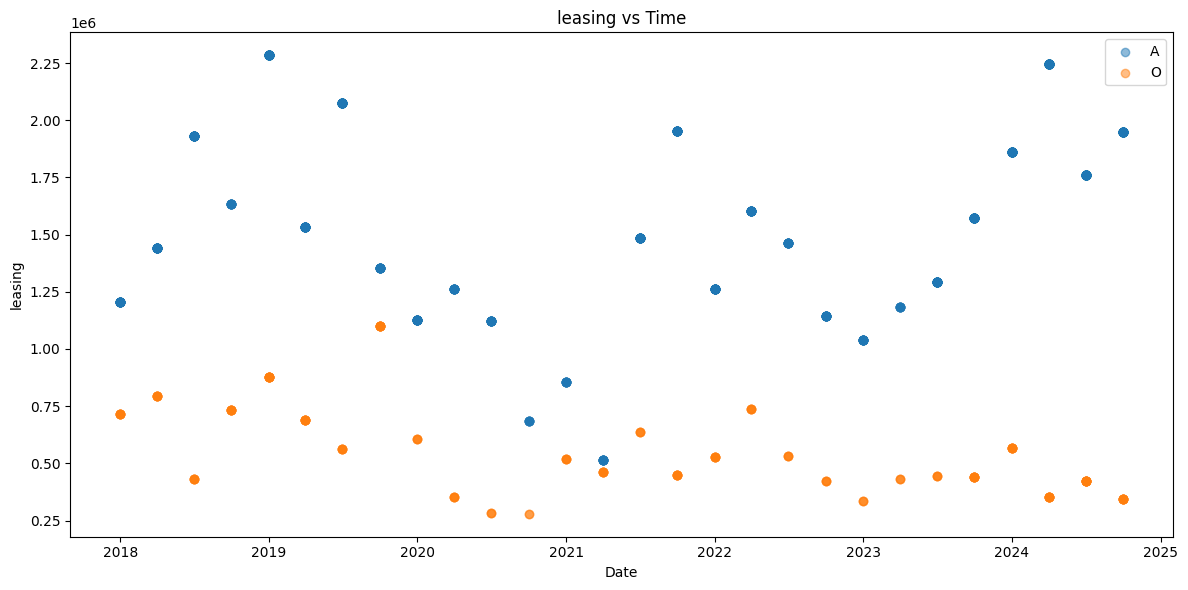

In [ ]:
import matplotlib.pyplot as plt

what_column_we_lookin_at = filtered_data_sorted.columns[34]

plt.figure(figsize=(12, 6))

A_building_type = filtered_data_sorted[filtered_data_sorted["internal_class"] == "A"]
O_building_type = filtered_data_sorted[filtered_data_sorted["internal_class"] == "O"]

plt.scatter(A_building_type["date"], A_building_type[what_column_we_lookin_at], marker="o", alpha=0.5, label="A")
plt.scatter(O_building_type["date"], O_building_type[what_column_we_lookin_at], marker="o", alpha=0.5, label="O")
plt.title(what_column_we_lookin_at + " vs Time")
plt.xlabel("Date")
plt.ylabel(what_column_we_lookin_at)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
raw_unemployment = pd.read_csv("/content/drive/MyDrive/Unemployment.csv")

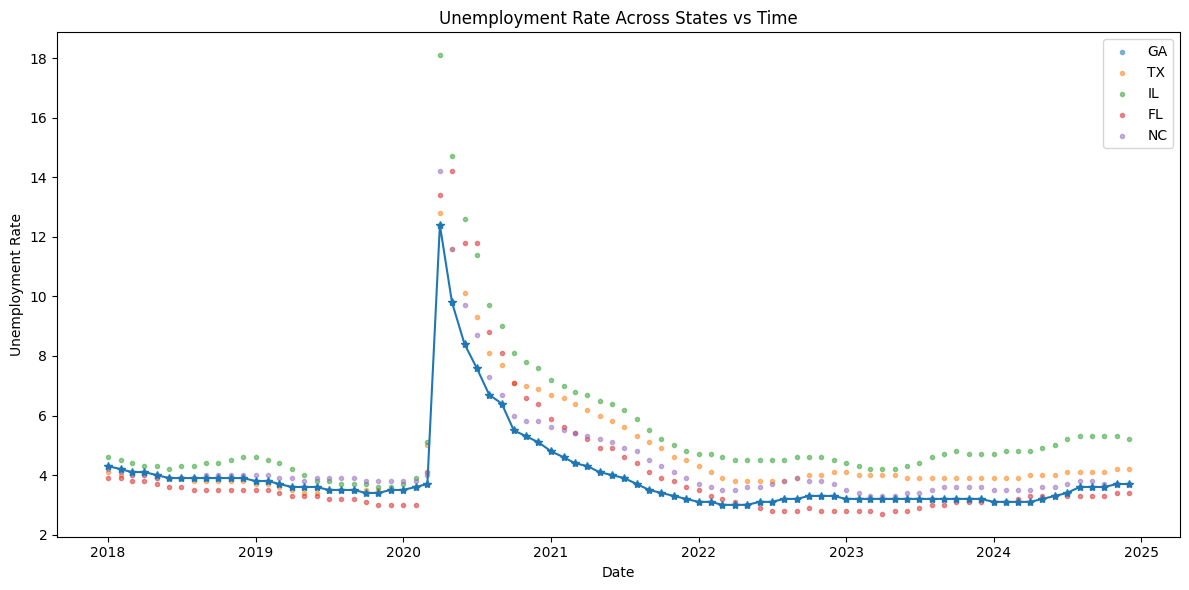

In [ ]:
georgia_data = raw_unemployment[raw_unemployment["state"] == "GA"]

raw_unemployment["date"] = pd.to_datetime(raw_unemployment["year"].astype(str) + "-" + raw_unemployment["month"].astype(str), format='%Y-%m')

plt.figure(figsize=(12, 6))
state_comparison = ["GA", "TX", "IL", "FL", "NC"]
#state_comparison = raw_unemployment["state"].unique() # all of them
for state in state_comparison:
  specific_state = raw_unemployment[raw_unemployment["state"] == state]
  plt.scatter(specific_state["date"], specific_state["unemployment_rate"], marker=".", alpha=0.5)
plt.plot(georgia_data["date"], georgia_data["unemployment_rate"], marker="*", alpha=1)

#plt.scatter(raw_unemployment["date"], raw_unemployment["unemployment_rate"], marker="o", alpha=0.5)
plt.title("Unemployment Rate Across States vs Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.tight_layout()
plt.legend(state_comparison)
plt.show()